In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
s_weather_df = pd.read_csv('SWeather2018.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_df)

,Datum,MedTemp,MaxTemp,MinTemp,Niederschlag,Monat,MedGlobalstrahlung,MedStarhlungBilanz
0,01.01.2014,6.2,9.8,2.4,0.00,1.0,44.9,-17.8
1,02.01.2014,7.0,10.0,4.8,1.60,1.0,24.3,-37.1
2,03.01.2014,7.8,10.8,4.3,0.30,1.0,22.4,-35.1
3,04.01.2014,7.7,9.7,5.6,1.33,1.0,11.9,-31.8
4,05.01.2014,5.8,8.6,1.4,0.72,1.0,29.1,-41.2
...,...,...,...,...,...,...,...,...
1885,01.03.2019,9.2,11.9,7.6,5.60,3.0,51.9,-1.5
1886,02.03.2019,9.2,12.3,7.1,0.00,3.0,54.0,16.4
1887,03.03.2019,11.1,13.6,7.7,0.00,3.0,59.6,11.6
1888,04.03.2019,9.9,14.3,4.8,4.40,3.0,72.0,-0.6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


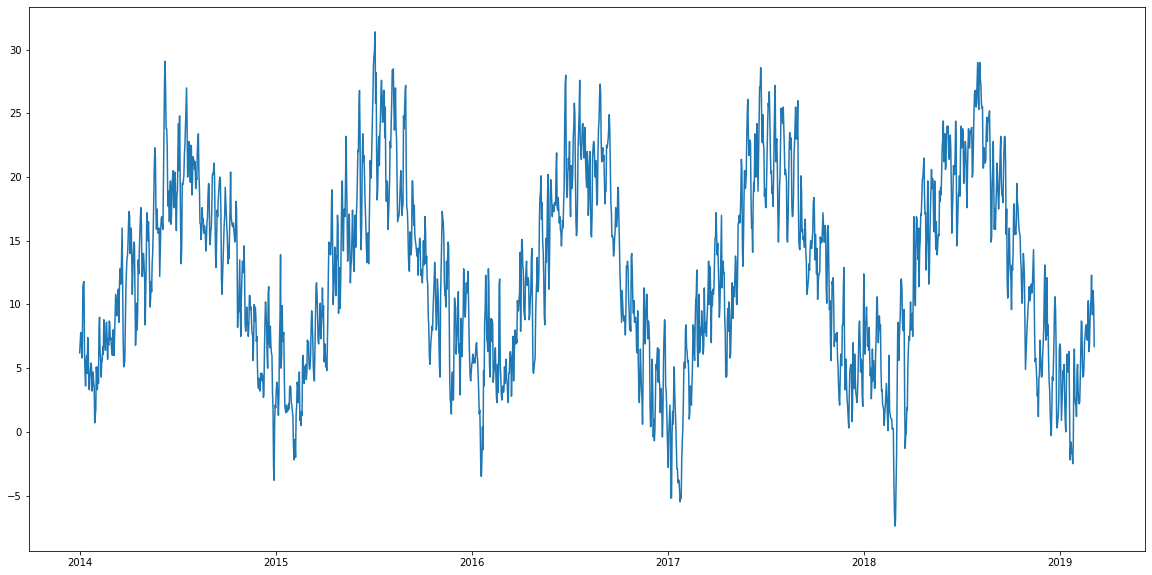

In [4]:
med_temp = s_weather_df['MedTemp']
dates = np.arange('2014-01-01', '2019-03-06', dtype='datetime64[D]')
plt.plot(dates, med_temp)
plt.show()
# plt.savefig('stuttgart_history.pdf')

In [5]:
s = s_weather_df['MedTemp']

In [6]:
lastN = 3
until = 1
#cols = [1, 2, 3, 4, 5, 6, 7]
cols = [1]

x = []
for i in range(lastN, s.size - 2):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            x_inputs.append(s_weather_df.iloc[k, j])
    x.append(x_inputs)

y = []
for i in range(lastN, s.size - 2):
    y.append([s_weather_df.iloc[i, 1], s_weather_df.iloc[i + 1, 1], s_weather_df.iloc[i + 2, 1]])

for i in range(len(x)):    
    print(i, x[i], y[i])

0 [6.2, 7.0, 7.8] [7.7, 5.8, 7.1]
1 [7.0, 7.8, 7.7] [5.8, 7.1, 11.4]
2 [7.8, 7.7, 5.8] [7.1, 11.4, 11.7]
3 [7.7, 5.8, 7.1] [11.4, 11.7, 11.8]
4 [5.8, 7.1, 11.4] [11.7, 11.8, 6.1]
5 [7.1, 11.4, 11.7] [11.8, 6.1, 4.6]
6 [11.4, 11.7, 11.8] [6.1, 4.6, 3.6]
7 [11.7, 11.8, 6.1] [4.6, 3.6, 5.5]
8 [11.8, 6.1, 4.6] [3.6, 5.5, 6.0]
9 [6.1, 4.6, 3.6] [5.5, 6.0, 4.6]
10 [4.6, 3.6, 5.5] [6.0, 4.6, 7.4]
11 [3.6, 5.5, 6.0] [4.6, 7.4, 6.5]
12 [5.5, 6.0, 4.6] [7.4, 6.5, 3.5]
13 [6.0, 4.6, 7.4] [6.5, 3.5, 3.3]
14 [4.6, 7.4, 6.5] [3.5, 3.3, 4.2]
15 [7.4, 6.5, 3.5] [3.3, 4.2, 4.9]
16 [6.5, 3.5, 3.3] [4.2, 4.9, 5.4]
17 [3.5, 3.3, 4.2] [4.9, 5.4, 5.1]
18 [3.3, 4.2, 4.9] [5.4, 5.1, 3.2]
19 [4.2, 4.9, 5.4] [5.1, 3.2, 3.7]
20 [4.9, 5.4, 5.1] [3.2, 3.7, 4.7]
21 [5.4, 5.1, 3.2] [3.7, 4.7, 3.9]
22 [5.1, 3.2, 3.7] [4.7, 3.9, 3.6]
23 [3.2, 3.7, 4.7] [3.9, 3.6, 0.7]
24 [3.7, 4.7, 3.9] [3.6, 0.7, 1.3]
25 [4.7, 3.9, 3.6] [0.7, 1.3, 1.7]
26 [3.9, 3.6, 0.7] [1.3, 1.7, 5.1]
27 [3.6, 0.7, 1.3] [1.7, 5.1, 4.2]
28 [0.7, 1.3

485 [9.7, 11.9, 15.4] [19.1, 19.7, 16.2]
486 [11.9, 15.4, 19.1] [19.7, 16.2, 14.2]
487 [15.4, 19.1, 19.7] [16.2, 14.2, 17.3]
488 [19.1, 19.7, 16.2] [14.2, 17.3, 17.5]
489 [19.7, 16.2, 14.2] [17.3, 17.5, 16.9]
490 [16.2, 14.2, 17.3] [17.5, 16.9, 19.6]
491 [14.2, 17.3, 17.5] [16.9, 19.6, 23.2]
492 [17.3, 17.5, 16.9] [19.6, 23.2, 19.6]
493 [17.5, 16.9, 19.6] [23.2, 19.6, 16.8]
494 [16.9, 19.6, 23.2] [19.6, 16.8, 13.4]
495 [19.6, 23.2, 19.6] [16.8, 13.4, 15.4]
496 [23.2, 19.6, 16.8] [13.4, 15.4, 15.6]
497 [19.6, 16.8, 13.4] [15.4, 15.6, 17.1]
498 [16.8, 13.4, 15.4] [15.6, 17.1, 14.4]
499 [13.4, 15.4, 15.6] [17.1, 14.4, 11.7]
500 [15.4, 15.6, 17.1] [14.4, 11.7, 12.9]
501 [15.6, 17.1, 14.4] [11.7, 12.9, 13.6]
502 [17.1, 14.4, 11.7] [12.9, 13.6, 15.3]
503 [14.4, 11.7, 12.9] [13.6, 15.3, 17.4]
504 [11.7, 12.9, 13.6] [15.3, 17.4, 15.8]
505 [12.9, 13.6, 15.3] [17.4, 15.8, 13.2]
506 [13.6, 15.3, 17.4] [15.8, 13.2, 12.6]
507 [15.3, 17.4, 15.8] [13.2, 12.6, 15.3]
508 [17.4, 15.8, 13.2] [12.6, 15.3,

818 [10.4, 10.9, 14.1] [7.9, 11.2, 15.1]
819 [10.9, 14.1, 7.9] [11.2, 15.1, 15.1]
820 [14.1, 7.9, 11.2] [15.1, 15.1, 13.1]
821 [7.9, 11.2, 15.1] [15.1, 13.1, 12.7]
822 [11.2, 15.1, 15.1] [13.1, 12.7, 9.6]
823 [15.1, 15.1, 13.1] [12.7, 9.6, 9.1]
824 [15.1, 13.1, 12.7] [9.6, 9.1, 8.8]
825 [13.1, 12.7, 9.6] [9.1, 8.8, 12.0]
826 [12.7, 9.6, 9.1] [8.8, 12.0, 12.6]
827 [9.6, 9.1, 8.8] [12.0, 12.6, 13.4]
828 [9.1, 8.8, 12.0] [12.6, 13.4, 11.5]
829 [8.8, 12.0, 12.6] [13.4, 11.5, 11.6]
830 [12.0, 12.6, 13.4] [11.5, 11.6, 12.1]
831 [12.6, 13.4, 11.5] [11.6, 12.1, 11.8]
832 [13.4, 11.5, 11.6] [12.1, 11.8, 8.8]
833 [11.5, 11.6, 12.1] [11.8, 8.8, 9.2]
834 [11.6, 12.1, 11.8] [8.8, 9.2, 10.4]
835 [12.1, 11.8, 8.8] [9.2, 10.4, 11.0]
836 [11.8, 8.8, 9.2] [10.4, 11.0, 13.6]
837 [8.8, 9.2, 10.4] [11.0, 13.6, 14.4]
838 [9.2, 10.4, 11.0] [13.6, 14.4, 9.3]
839 [10.4, 11.0, 13.6] [14.4, 9.3, 4.8]
840 [11.0, 13.6, 14.4] [9.3, 4.8, 4.6]
841 [13.6, 14.4, 9.3] [4.8, 4.6, 5.0]
842 [14.4, 9.3, 4.8] [4.6, 5.0, 5.5]

1151 [5.1, 8.2, 10.8] [6.2, 6.4, 8.2]
1152 [8.2, 10.8, 6.2] [6.4, 8.2, 7.6]
1153 [10.8, 6.2, 6.4] [8.2, 7.6, 9.5]
1154 [6.2, 6.4, 8.2] [7.6, 9.5, 8.6]
1155 [6.4, 8.2, 7.6] [9.5, 8.6, 7.2]
1156 [8.2, 7.6, 9.5] [8.6, 7.2, 6.1]
1157 [7.6, 9.5, 8.6] [7.2, 6.1, 6.8]
1158 [9.5, 8.6, 7.2] [6.1, 6.8, 11.3]
1159 [8.6, 7.2, 6.1] [6.8, 11.3, 8.6]
1160 [7.2, 6.1, 6.8] [11.3, 8.6, 7.8]
1161 [6.1, 6.8, 11.3] [8.6, 7.8, 8.6]
1162 [6.8, 11.3, 8.6] [7.8, 8.6, 7.5]
1163 [11.3, 8.6, 7.8] [8.6, 7.5, 8.9]
1164 [8.6, 7.8, 8.6] [7.5, 8.9, 9.8]
1165 [7.8, 8.6, 7.5] [8.9, 9.8, 11.2]
1166 [8.6, 7.5, 8.9] [9.8, 11.2, 13.4]
1167 [7.5, 8.9, 9.8] [11.2, 13.4, 10.0]
1168 [8.9, 9.8, 11.2] [13.4, 10.0, 13.0]
1169 [9.8, 11.2, 13.4] [10.0, 13.0, 12.6]
1170 [11.2, 13.4, 10.0] [13.0, 12.6, 10.4]
1171 [13.4, 10.0, 13.0] [12.6, 10.4, 7.0]
1172 [10.0, 13.0, 12.6] [10.4, 7.0, 11.0]
1173 [13.0, 12.6, 10.4] [7.0, 11.0, 9.9]
1174 [12.6, 10.4, 7.0] [11.0, 9.9, 11.2]
1175 [10.4, 7.0, 11.0] [9.9, 11.2, 10.8]
1176 [7.0, 11.0, 9.9] [

1484 [10.0, 10.6, 8.5] [7.0, 8.2, 9.1]
1485 [10.6, 8.5, 7.0] [8.2, 9.1, 8.0]
1486 [8.5, 7.0, 8.2] [9.1, 8.0, 8.4]
1487 [7.0, 8.2, 9.1] [8.0, 8.4, 4.9]
1488 [8.2, 9.1, 8.0] [8.4, 4.9, 3.2]
1489 [9.1, 8.0, 8.4] [4.9, 3.2, 3.3]
1490 [8.0, 8.4, 4.9] [3.2, 3.3, 2.1]
1491 [8.4, 4.9, 3.2] [3.3, 2.1, 2.0]
1492 [4.9, 3.2, 3.3] [2.1, 2.0, 1.7]
1493 [3.2, 3.3, 2.1] [2.0, 1.7, 0.5]
1494 [3.3, 2.1, 2.0] [1.7, 0.5, 1.4]
1495 [2.1, 2.0, 1.7] [0.5, 1.4, 2.1]
1496 [2.0, 1.7, 0.5] [1.4, 2.1, 3.0]
1497 [1.7, 0.5, 1.4] [2.1, 3.0, 3.8]
1498 [0.5, 1.4, 2.1] [3.0, 3.8, 2.4]
1499 [1.4, 2.1, 3.0] [3.8, 2.4, 1.2]
1500 [2.1, 3.0, 3.8] [2.4, 1.2, 0.1]
1501 [3.0, 3.8, 2.4] [1.2, 0.1, 3.0]
1502 [3.8, 2.4, 1.2] [0.1, 3.0, 6.0]
1503 [2.4, 1.2, 0.1] [3.0, 6.0, 1.6]
1504 [1.2, 0.1, 3.0] [6.0, 1.6, 1.4]
1505 [0.1, 3.0, 6.0] [1.6, 1.4, 1.1]
1506 [3.0, 6.0, 1.6] [1.4, 1.1, 1.0]
1507 [6.0, 1.6, 1.4] [1.1, 1.0, 1.0]
1508 [1.6, 1.4, 1.1] [1.0, 1.0, 0.2]
1509 [1.4, 1.1, 1.0] [1.0, 0.2, 0.3]
1510 [1.1, 1.0, 1.0] [0.2, 0.3, 0.1

1817 [9.6, 6.8, 0.7] [0.3, 0.8, 1.3]
1818 [6.8, 0.7, 0.3] [0.8, 1.3, 2.4]
1819 [0.7, 0.3, 0.8] [1.3, 2.4, 6.5]
1820 [0.3, 0.8, 1.3] [2.4, 6.5, 6.9]
1821 [0.8, 1.3, 2.4] [6.5, 6.9, 6.7]
1822 [1.3, 2.4, 6.5] [6.9, 6.7, 3.6]
1823 [2.4, 6.5, 6.9] [6.7, 3.6, 0.9]
1824 [6.5, 6.9, 6.7] [3.6, 0.9, 2.3]
1825 [6.9, 6.7, 3.6] [0.9, 2.3, 3.6]
1826 [6.7, 3.6, 0.9] [2.3, 3.6, 4.8]
1827 [3.6, 0.9, 2.3] [3.6, 4.8, 4.3]
1828 [0.9, 2.3, 3.6] [4.8, 4.3, 5.3]
1829 [2.3, 3.6, 4.8] [4.3, 5.3, 2.4]
1830 [3.6, 4.8, 4.3] [5.3, 2.4, 0.9]
1831 [4.8, 4.3, 5.3] [2.4, 0.9, 0.0]
1832 [4.3, 5.3, 2.4] [0.9, 0.0, 3.3]
1833 [5.3, 2.4, 0.9] [0.0, 3.3, 6.1]
1834 [2.4, 0.9, 0.0] [3.3, 6.1, 5.6]
1835 [0.9, 0.0, 3.3] [6.1, 5.6, 4.7]
1836 [0.0, 3.3, 6.1] [5.6, 4.7, 5.3]
1837 [3.3, 6.1, 5.6] [4.7, 5.3, 6.3]
1838 [6.1, 5.6, 4.7] [5.3, 6.3, 1.8]
1839 [5.6, 4.7, 5.3] [6.3, 1.8, -2.2]
1840 [4.7, 5.3, 6.3] [1.8, -2.2, -1.3]
1841 [5.3, 6.3, 1.8] [-2.2, -1.3, -0.8]
1842 [6.3, 1.8, -2.2] [-1.3, -0.8, -1.6]
1843 [1.8, -2.2, -1.3] [-0.8

In [7]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler().fit(x)
scalery = MinMaxScaler().fit(y)
x = scalerX.transform(x)
y = scalery.transform(y)



In [8]:
print(x)

[[0.35051546 0.37113402 0.39175258]
 [0.37113402 0.39175258 0.38917526]
 [0.39175258 0.38917526 0.34020619]
 ...
 [0.44845361 0.45618557 0.50773196]
 [0.45618557 0.50773196 0.42783505]
 [0.50773196 0.42783505 0.42783505]]


In [9]:
print(y)

[[0.38917526 0.34020619 0.37371134]
 [0.34020619 0.37371134 0.48453608]
 [0.37371134 0.48453608 0.49226804]
 ...
 [0.42783505 0.42783505 0.47680412]
 [0.42783505 0.47680412 0.44587629]
 [0.47680412 0.44587629 0.36340206]]


In [11]:
layer = (32, 32, 32)
#model = MLPRegressor(layer, max_iter=5000, activation='logistic', solver='adam', verbose=True, n_iter_no_change=10, tol=0.0001)
model = MLPRegressor(layer, max_iter=5000, batch_size=64, activation='logistic', solver='adam', verbose=True, n_iter_no_change=200, tol=1e-9)
model.fit(x, y)

Iteration 1, loss = 0.25213833
Iteration 2, loss = 0.03461303
Iteration 3, loss = 0.01794411
Iteration 4, loss = 0.01779241
Iteration 5, loss = 0.01772382
Iteration 6, loss = 0.01768515
Iteration 7, loss = 0.01764693
Iteration 8, loss = 0.01761518
Iteration 9, loss = 0.01758205
Iteration 10, loss = 0.01749719
Iteration 11, loss = 0.01744306
Iteration 12, loss = 0.01738446
Iteration 13, loss = 0.01733483
Iteration 14, loss = 0.01725067
Iteration 15, loss = 0.01718702
Iteration 16, loss = 0.01711985
Iteration 17, loss = 0.01701750
Iteration 18, loss = 0.01693076
Iteration 19, loss = 0.01680684
Iteration 20, loss = 0.01676752
Iteration 21, loss = 0.01664596
Iteration 22, loss = 0.01650369
Iteration 23, loss = 0.01635893
Iteration 24, loss = 0.01620962
Iteration 25, loss = 0.01607926
Iteration 26, loss = 0.01582317
Iteration 27, loss = 0.01557328
Iteration 28, loss = 0.01538088
Iteration 29, loss = 0.01503406
Iteration 30, loss = 0.01466252
Iteration 31, loss = 0.01418593
Iteration 32, los

Iteration 253, loss = 0.00306710
Iteration 254, loss = 0.00305636
Iteration 255, loss = 0.00304892
Iteration 256, loss = 0.00304943
Iteration 257, loss = 0.00304978
Iteration 258, loss = 0.00306636
Iteration 259, loss = 0.00305262
Iteration 260, loss = 0.00306599
Iteration 261, loss = 0.00311649
Iteration 262, loss = 0.00311309
Iteration 263, loss = 0.00305138
Iteration 264, loss = 0.00309318
Iteration 265, loss = 0.00312559
Iteration 266, loss = 0.00306325
Iteration 267, loss = 0.00304330
Iteration 268, loss = 0.00305609
Iteration 269, loss = 0.00305863
Iteration 270, loss = 0.00305242
Iteration 271, loss = 0.00306631
Iteration 272, loss = 0.00308013
Iteration 273, loss = 0.00307363
Iteration 274, loss = 0.00309720
Iteration 275, loss = 0.00312381
Iteration 276, loss = 0.00310483
Iteration 277, loss = 0.00305915
Iteration 278, loss = 0.00310056
Iteration 279, loss = 0.00310605
Iteration 280, loss = 0.00311376
Iteration 281, loss = 0.00319418
Iteration 282, loss = 0.00311491
Iteration 

Iteration 503, loss = 0.00300242
Iteration 504, loss = 0.00299402
Iteration 505, loss = 0.00302132
Iteration 506, loss = 0.00300710
Iteration 507, loss = 0.00301352
Iteration 508, loss = 0.00299802
Iteration 509, loss = 0.00307399
Iteration 510, loss = 0.00301209
Iteration 511, loss = 0.00306143
Iteration 512, loss = 0.00302370
Iteration 513, loss = 0.00299620
Iteration 514, loss = 0.00301277
Iteration 515, loss = 0.00308223
Iteration 516, loss = 0.00304095
Iteration 517, loss = 0.00301405
Iteration 518, loss = 0.00298082
Iteration 519, loss = 0.00301054
Iteration 520, loss = 0.00300794
Iteration 521, loss = 0.00298986
Iteration 522, loss = 0.00298948
Iteration 523, loss = 0.00298943
Iteration 524, loss = 0.00300614
Iteration 525, loss = 0.00300967
Iteration 526, loss = 0.00301610
Iteration 527, loss = 0.00303099
Iteration 528, loss = 0.00301908
Iteration 529, loss = 0.00299615
Iteration 530, loss = 0.00301588
Iteration 531, loss = 0.00300453
Iteration 532, loss = 0.00301062
Iteration 

Iteration 759, loss = 0.00306243
Iteration 760, loss = 0.00301822
Iteration 761, loss = 0.00299269
Iteration 762, loss = 0.00299460
Iteration 763, loss = 0.00300357
Iteration 764, loss = 0.00304355
Iteration 765, loss = 0.00303940
Iteration 766, loss = 0.00301918
Iteration 767, loss = 0.00302297
Iteration 768, loss = 0.00299873
Iteration 769, loss = 0.00298343
Iteration 770, loss = 0.00298826
Iteration 771, loss = 0.00298715
Iteration 772, loss = 0.00301242
Iteration 773, loss = 0.00299311
Iteration 774, loss = 0.00301728
Iteration 775, loss = 0.00297633
Iteration 776, loss = 0.00299471
Iteration 777, loss = 0.00305399
Iteration 778, loss = 0.00300620
Iteration 779, loss = 0.00300659
Iteration 780, loss = 0.00298403
Iteration 781, loss = 0.00300188
Iteration 782, loss = 0.00304090
Iteration 783, loss = 0.00300412
Iteration 784, loss = 0.00303162
Iteration 785, loss = 0.00299222
Iteration 786, loss = 0.00301559
Iteration 787, loss = 0.00300508
Iteration 788, loss = 0.00297816
Iteration 

MLPRegressor(activation='logistic', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 32, 32), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=200, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-09,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [12]:
#y_predicted_sample = model.predict([[9.2, 10.2, 11.2, 6.0, 7.2, 12.9, 11.9, 16.0, 8, 11, 6.2, 7.9, 7.4, 3.6, 1.9]])
#y_should_sample = 7.3

#print('The predicted value is', y_predicted_sample)
#print('The real value was', y_should_sample)
print('Accuracy testing : {:.3f}'.format(model.score(x, y)))
print('Loss : {:.3f}'.format(model.loss_))

Accuracy testing : 0.841
Loss : 0.003


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [26]:
s_weather_to_predict_df = pd.read_csv('STemp201903.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_to_predict_df)

,Datum,A,B,C,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,01.03.2019,9.2,11.9,7.6,5.6,3.0,51.9,-1.5
1,02.03.2019,9.2,12.3,7.1,0.0,3.0,54.0,16.4
2,03.03.2019,11.1,13.6,7.7,0.0,3.0,59.6,11.6
3,04.03.2019,9.9,14.3,4.8,4.4,3.0,72.0,-0.6
4,05.03.2019,6.7,10.6,4.6,2.9,3.0,87.0,7.0
...,...,...,...,...,...,...,...,...
209,26.09.2019,16.9,20.1,14.0,0.0,9.0,58.7,25.0
210,27.09.2019,17.2,20.4,14.6,3.6,9.0,56.3,4.0
211,28.09.2019,16.0,19.7,13.4,1.2,9.0,95.4,25.5
212,29.09.2019,17.4,24.6,11.8,0.3,9.0,137.7,38.3


In [27]:
tlen = s_weather_to_predict_df['A'].size
x_test = []

for i in range(lastN, tlen - 2):
    x_inputs = []
    for j in cols:
        for k in range(i - lastN, i):
            #print(k, j)
            x_inputs.append(s_weather_to_predict_df.iloc[k, j])
    x_test.append(x_inputs)


    
y_test = []
for i in range(lastN, tlen - 2):
    y_test.append(s_weather_to_predict_df.iloc[i, 1])
    
print(y_test[0])
x_test

9.9


[[9.2, 9.2, 11.1],
 [9.2, 11.1, 9.9],
 [11.1, 9.9, 6.7],
 [9.9, 6.7, 10.7],
 [6.7, 10.7, 10.9],
 [10.7, 10.9, 9.2],
 [10.9, 9.2, 10.2],
 [9.2, 10.2, 11.2],
 [10.2, 11.2, 6.0],
 [11.2, 6.0, 7.2],
 [6.0, 7.2, 7.3],
 [7.2, 7.3, 5.9],
 [7.3, 5.9, 9.7],
 [5.9, 9.7, 12.2],
 [9.7, 12.2, 10.7],
 [12.2, 10.7, 5.7],
 [10.7, 5.7, 6.0],
 [5.7, 6.0, 6.4],
 [6.0, 6.4, 8.6],
 [6.4, 8.6, 10.6],
 [8.6, 10.6, 11.9],
 [10.6, 11.9, 10.6],
 [11.9, 10.6, 7.5],
 [10.6, 7.5, 6.8],
 [7.5, 6.8, 8.7],
 [6.8, 8.7, 9.4],
 [8.7, 9.4, 12.7],
 [9.4, 12.7, 13.0],
 [12.7, 13.0, 13.4],
 [13.0, 13.4, 13.1],
 [13.4, 13.1, 14.4],
 [13.1, 14.4, 11.1],
 [14.4, 11.1, 5.8],
 [11.1, 5.8, 7.6],
 [5.8, 7.6, 9.7],
 [7.6, 9.7, 11.8],
 [9.7, 11.8, 12.2],
 [11.8, 12.2, 11.8],
 [12.2, 11.8, 11.4],
 [11.8, 11.4, 9.1],
 [11.4, 9.1, 6.7],
 [9.1, 6.7, 5.2],
 [6.7, 5.2, 6.2],
 [5.2, 6.2, 10.6],
 [6.2, 10.6, 12.2],
 [10.6, 12.2, 14.3],
 [12.2, 14.3, 15.2],
 [14.3, 15.2, 16.9],
 [15.2, 16.9, 17.1],
 [16.9, 17.1, 16.9],
 [17.1, 16.9, 17.7],
 

In [28]:
x_test[0]

[9.2, 9.2, 11.1]

In [29]:
y_predicted_test = model.predict([x_test[0]])
print(y_predicted_test)

[[1.19186512 1.06008251 0.97833242]]


In [30]:
x_test = scalerX.transform(x_test)
y_predicted = model.predict(x_test)

for i in range(10):
    print(i, y_test[i], y_predicted[i + 1])

0 9.9 [0.42667372 0.43186024 0.43381293]
1 6.7 [0.35469925 0.37149497 0.38147289]
2 10.7 [0.49569698 0.48329378 0.47310109]
3 10.9 [0.44569614 0.4434527  0.44032818]
4 9.2 [0.4164271  0.42503246 0.4293359 ]
5 10.2 [0.46312303 0.46190555 0.45937073]
6 11.2 [0.47388183 0.47044628 0.46634116]
7 6.0 [0.31822117 0.34208444 0.35679535]
8 7.2 [0.40535191 0.40695481 0.40663293]
9 7.3 [0.36844414 0.37049435 0.3704801 ]


In [31]:
y_predicted = y_predicted.reshape(-1, 3)
y_predicted

array([[0.48021457, 0.47389423, 0.46783232],
       [0.42667372, 0.43186024, 0.43381293],
       [0.35469925, 0.37149497, 0.38147289],
       [0.49569698, 0.48329378, 0.47310109],
       [0.44569614, 0.4434527 , 0.44032818],
       [0.4164271 , 0.42503246, 0.4293359 ],
       [0.46312303, 0.46190555, 0.45937073],
       [0.47388183, 0.47044628, 0.46634116],
       [0.31822117, 0.34208444, 0.35679535],
       [0.40535191, 0.40695481, 0.40663293],
       [0.36844414, 0.37049435, 0.3704801 ],
       [0.33413219, 0.34396531, 0.34914497],
       [0.45816803, 0.44558392, 0.43555139],
       [0.48937584, 0.47756929, 0.467788  ],
       [0.44326974, 0.44894137, 0.45111428],
       [0.32508312, 0.3497477 , 0.36504497],
       [0.37036492, 0.37620981, 0.37878893],
       [0.35210088, 0.35429166, 0.3543414 ],
       [0.41358081, 0.40679697, 0.400815  ],
       [0.45459259, 0.44645209, 0.43936529],
       [0.48768698, 0.48213379, 0.47650422],
       [0.4483206 , 0.45406457, 0.45625701],
       [0.

In [32]:
y_predicted = scalery.inverse_transform(y_predicted)

In [33]:
y_predicted

array([[11.23232537, 10.98709607, 10.75189402],
       [ 9.15494024,  9.35617727,  9.43194181],
       [ 6.36233077,  7.01400493,  7.40114797],
       [11.8330428 , 11.35179878, 10.95632222],
       [ 9.89301042,  9.8059646 ,  9.68473347],
       [ 8.75737157,  9.09125935,  9.2582329 ],
       [10.56917369, 10.5219352 , 10.42358449],
       [10.98661484, 10.85331562, 10.69403705],
       [ 4.94698143,  5.87287629,  6.44365973],
       [ 8.32765424,  8.38984681,  8.37735752],
       [ 6.8956326 ,  6.97518096,  6.97462776],
       [ 5.56432881,  5.94585386,  6.14682485],
       [10.37691941,  9.88865599,  9.49939375],
       [11.58778259, 11.12968835, 10.75017455],
       [ 9.79886592, 10.01892521, 10.10323395],
       [ 5.21322522,  6.17021077,  6.76374468],
       [ 6.97015873,  7.19694068,  7.29701063],
       [ 6.26151408,  6.34651631,  6.34844642],
       [ 8.64693528,  8.38372231,  8.15162196],
       [10.23819242,  9.92234123,  9.6473732 ],
       [11.52225466, 11.30679115, 11.088

In [36]:
print('Accuracy testing : {:.3f}'.format(model.score(x_test, [y_test])))

ValueError: Found input variables with inconsistent numbers of samples: [1, 209]

In [25]:
yp = y_predicted[1:].ravel().tolist()
yt = y_test[0:-1]


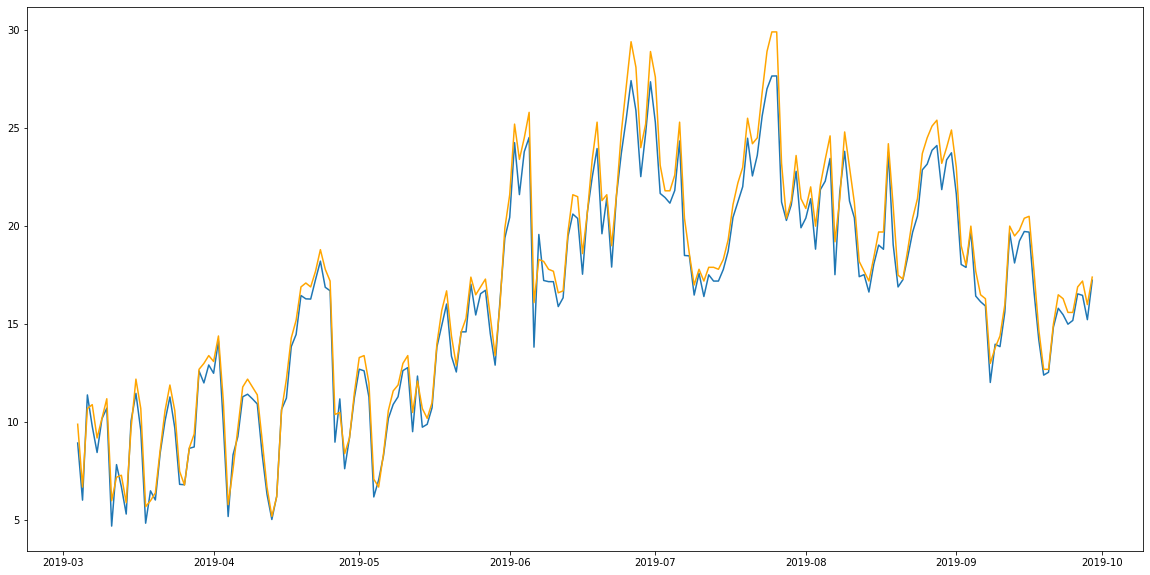

In [31]:
dates2 = np.arange('2019-03-04', '2019-09-30', dtype='datetime64[D]')
plt.plot(dates2, yp)
plt.plot(dates2, yt, c='orange')

plt.show()

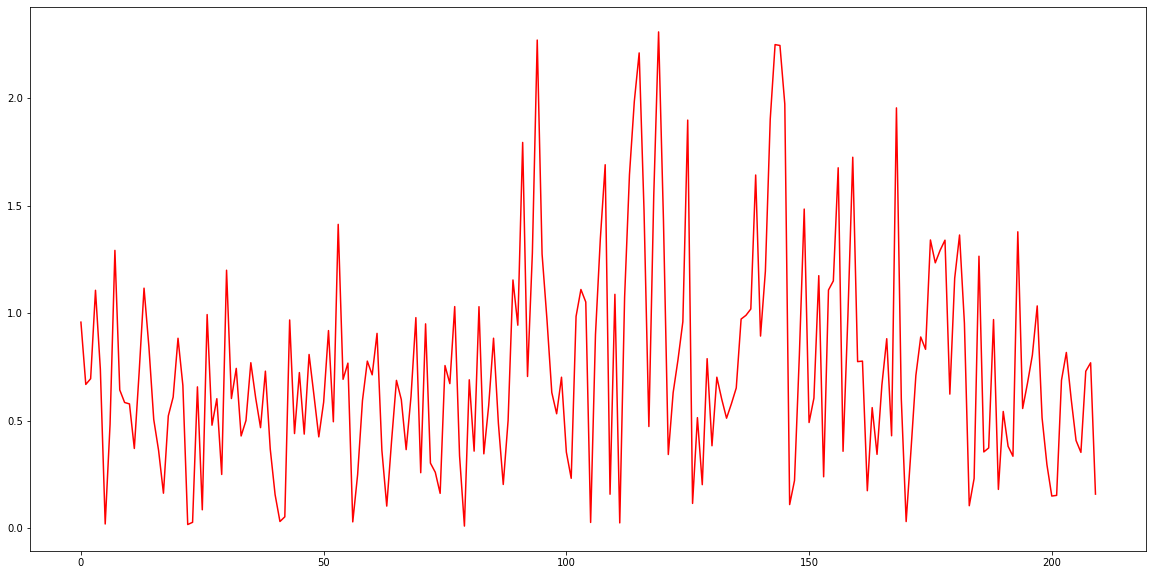

In [24]:
plt.plot(np.arange(len(yt)), np.abs(np.diff([yt, yp], axis=0)).ravel(), c='red')
plt.show()

In [25]:
print('Max abs error:', '%.10f' % np.max(np.abs(np.diff([yt, yp], axis=0).ravel())))
print('Min abs error:', '%.10f' % np.min(np.abs(np.diff([yt, yp], axis=0).ravel())))

Max abs error: 2.3074542516
Min abs error: 0.0095220491


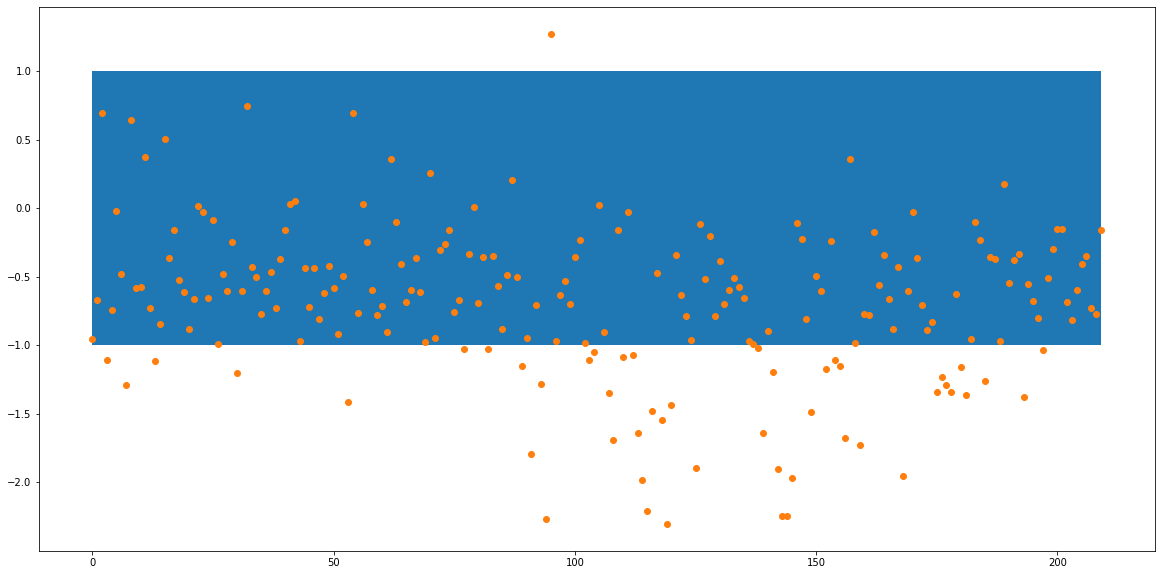

In [26]:
threshold = 1
plt.fill_between(np.arange(len(yp)), -threshold, threshold)
plt.scatter(np.arange(len(yp)), np.diff([yt, yp], axis=0))
plt.show()

In [27]:
ok_values = 0
bad_values = 0

diffs = np.diff([yt, yp], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1
Amount of good values 161
Amount of bad values 49
Percentage good/bad: 0.7666666666666667 / 0.23333333333333334


In [28]:
ok_values = 0
bad_values = 0
threshold = 1.5

diffs = np.diff([np.around(yt), np.around(yp)], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1.5
Amount of good values 191
Amount of bad values 19
Percentage good/bad: 0.9095238095238095 / 0.09047619047619047
